# NAO comparison

The notebook wants to compare results from teleconnections analysis of NAO from ERA5 with index evaluated by NCAR, available at https://climatedataguide.ucar.edu/sites/default/files/2022-10/nao_station_monthly.txt

## Data loading

Load NCAR data and NAO index from teleconnections analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools
import xarray as xr

diagname  = 'teleconnections'
machine   = 'wilma'

namelist = tools.load_namelist(diagname)
config   = tools.load_config(machine)

ncarfile = 'data/nao_station_monthly.txt'
infile   = config['teleconnections']['output']
infile  += '/NAO_indx.nc'

In [82]:
nao = xr.open_dataarray(infile)

ncar_nao = np.genfromtxt(ncarfile, skip_header=2)

year = ncar_nao[:, 0]
month_data = ncar_nao[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='M',calendar='standard')
month_data = month_data.reshape(-1)
ncar_nao = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')
ncar_nao.drop_sel('time':dt.time.dt.year.sel[2022])


SyntaxError: invalid syntax (38490301.py, line 10)

## Plot two dataset together

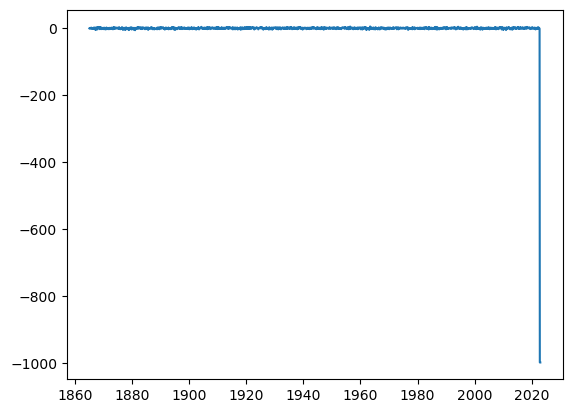

In [78]:
import datetime
import cftime

time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
plt.plot(datetimes, ncar_nao.values)
#plt.xlabel('Time')
#plt.ylabel(ncar_nao.values.name)
#plt.xlim([1865,2021])
#plt.title(ncar_nao.values.name + ' over Time')
plt.show()


In [71]:
time_vals

array([cftime.DatetimeGregorian(1865, 1, 31, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1865, 2, 28, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1865, 3, 31, 0, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2022, 10, 31, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2022, 11, 30, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2022, 12, 31, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)